In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn import preprocessing

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [2]:
import keras

In [3]:
seed_value = 7

import os
os.environ['PYTHONHASHSEED']=str(seed_value)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

import random
random.seed(seed_value)

np.random.seed(seed_value)

import tensorflow as tf
tf.random.set_seed(seed_value)

import keras.backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

In [4]:
data = pd.read_csv('OnlineNewsPopularity.csv')

In [5]:
data.columns = data.columns.str.lstrip()
data = data.drop(labels=['url', 'timedelta'], axis=1)

In [6]:
categories = ['Unpopular', 'Popular']
data['category'] = pd.qcut(data['shares'], q=[0,0.50,1], labels=categories)

In [7]:
label_encoder = preprocessing.LabelEncoder()

In [8]:
columns = ['kw_avg_avg', 'self_reference_min_shares', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'rate_positive_words',
       'rate_negative_words']

In [9]:
y = data.category
x = data.drop(labels = ['shares', 'category'], axis = 1)

In [10]:
y = label_encoder.fit_transform(y)

In [11]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.33, stratify=y, random_state=7)

In [12]:
scaler = preprocessing.StandardScaler()

In [13]:
scaler.fit(x_train)

StandardScaler()

In [14]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
number_of_features = x.shape[1]
output_size = 1

In [16]:
model = Sequential()
model.add(Input(shape=(number_of_features, )))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=output_size, activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3776      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,889
Trainable params: 5,889
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss=BinaryCrossentropy(), optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [19]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
664/664 [==============================] - 3s 3ms/step - loss: 0.6827 - accuracy: 0.5740 - val_loss: 0.6519 - val_accuracy: 0.6207
Epoch 2/10
664/664 [==============================] - 2s 3ms/step - loss: 0.6483 - accuracy: 0.6280 - val_loss: 0.6373 - val_accuracy: 0.6426
Epoch 3/10
664/664 [==============================] - 2s 3ms/step - loss: 0.6382 - accuracy: 0.6376 - val_loss: 0.6317 - val_accuracy: 0.6488
Epoch 4/10
664/664 [==============================] - 2s 2ms/step - loss: 0.6321 - accuracy: 0.6440 - val_loss: 0.6275 - val_accuracy: 0.6539
Epoch 5/10
664/664 [==============================] - 2s 3ms/step - loss: 0.6279 - accuracy: 0.6483 - val_loss: 0.6248 - val_accuracy: 0.6580
Epoch 6/10
664/664 [==============================] - 2s 3ms/step - loss: 0.6245 - accuracy: 0.6514 - val_loss: 0.6231 - val_accuracy: 0.6559
Epoch 7/10
664/664 [==============================] - 2s 2ms/step - loss: 0.6216 - accuracy: 0.6538 - val_loss: 0.6216 - val_accuracy: 0.6605
Epoch 

In [20]:
train_scores = model.evaluate(x_train, y_train, batch_size=32)
train_scores

831/831 [==============================] - 2s 2ms/step - loss: 0.6131 - accuracy: 0.6633


[0.6131495237350464, 0.6633033156394958]

In [21]:
test_scores = model.evaluate(x_test, y_test, batch_size=32)
test_scores

409/409 [==============================] - 1s 2ms/step - loss: 0.6299 - accuracy: 0.6458


[0.6298990249633789, 0.6457998752593994]

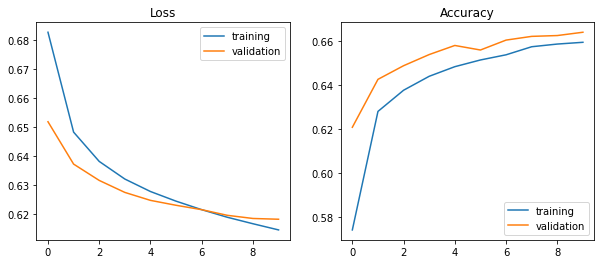

In [22]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history.epoch, history.history['loss'], label='training')
plt.plot(history.epoch, history.history['val_loss'], label='validation')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.epoch, history.history['accuracy'], label='training')
plt.plot(history.epoch, history.history['val_accuracy'], label='validation')
plt.legend(loc='best')

plt.show()